# Convolution and Pooling without using advanced Libraries*

### * matplotlib is used to visulaize images
### * numpy is used to manipulate arrays 

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Import an Image and Define some sample filters

[[-1  0  1]
 [-1  0  1]
 [-1  0  1]] [[-1 -1 -1]
 [ 0  0  0]
 [ 1  1  1]] (454, 640) (452, 638)


(3, 3)

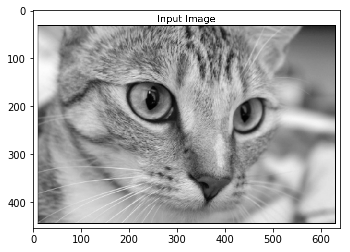

In [43]:
image = plt.imread('cat.PNG')
plt.imshow(image, cmap = 'gray')
img = np.array(image)
w = np.array([-1,0,1])
x = np.array([-1,0,1])
y = np.array([-1,0,1])
z = np.array([-1,-1,-1])
u = np.array([0,0,0])
v = np.array([1,1,1])

filter1 = np.array([w,x,y])
filter2 = np.array([z,u,v])
conv_blank = np.zeros((image.shape[0]-2,image.shape[1]-2))
print(filter1,filter2, image.shape,conv_blank.shape)
image[0:3,0:3].shape

## Visualize any of the Filter

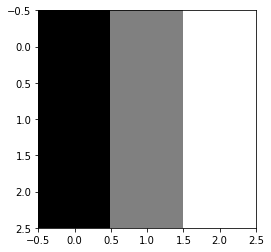

In [37]:
plt.imshow(filter1, cmap = 'gray')
#plt.imshow(filter2, cmap = 'gray')
plt.show()

##  Define Convolution Layer

In [39]:
def convolution(image,filters,c_blank):    
    for i in range(image.shape[0] - filters.shape[0] - 1):
        for j in range(image.shape[1] - filters.shape[1] - 1):
            c_blank[i][j] = single_stride(filters, image[i:i+3,j:j+3]) 
    return c_blank

def single_stride(filt,img):
    csum = 0
    for i in range(3):
        for j in range(3):
            csum = csum + (filt[i][j]*img[i][j])
    csum = csum/9
    return csum;
    

## Define Average - Pooling

In [40]:
def average_pooling(imagep,a_blank): 
    pool_sum = 0
    for i in range(imagep.shape[0] - 2):
        for j in range(imagep.shape[1] - 2):
            for q in range(i,i+3):
                for w in range(j,j+3):
                    pool_sum = pool_sum + imagep[q][w]
            a_blank[i][j] = pool_sum/9
        
    return a_blank

## Visualize Convoluted Image

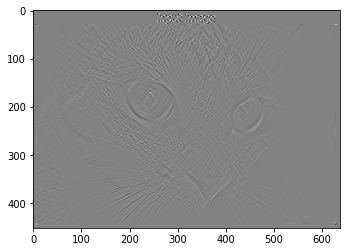

In [41]:
convoluted_image1 = convolution(image,filter1,conv_blank)
convoluted_image2 = convolution(convoluted_image1,filter2,conv_blank)
plt.imshow(convoluted_image2,cmap = 'gray')
#plt.imshow(convoluted_image1,cmap = 'gray')

## Visualize Pooled Image

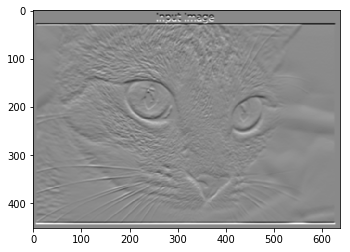

In [33]:
avg_pool1 = average_pooling(convoluted_image1,conv_blank)
plt.imshow(avg_pool1,cmap = 'gray')